In [2]:
import  numpy as np
from numpy.random import *
import math
import matplotlib.pyplot as plt
import scipy.stats
import statistics
import seaborn as sns
import csv
import pandas as pd
from statistics import mode

In [4]:
with open('dane1.csv', newline='') as plik1:
    dane1=csv.reader(plik1)
    X=[]
    for i in dane1:
        X.append(float(i[0]))
with open('dane2.csv', newline='') as plik2:
    dane2=csv.reader(plik2)
    Y=[]
    for i in dane2:
        Y.append(float(i[0]))

In [18]:
mean=np.mean(X)
variance= np.std(X)
sigma=np.sqrt(variance)
print(sigma)
print(mean)
print(variance)

0.44606207430363937
1.45546595425
0.19897137413206548


In [9]:
def zadanie1(X,sig,H0,alfa):
    t = np.linspace(-8, 8, 1000)
    y = [scipy.stats.norm.pdf(i) for i in t]
    sr = np.mean(X)
    n = len(X)
    z = (sr-H0)/sig * np.sqrt(n)
    p = [sr-sig/np.sqrt(n)*scipy.stats.norm.ppf(1-alfa/2),sr+sig/np.sqrt(n)*scipy.stats.norm.ppf(1-alfa/2)]
    plt.plot(t,y,label=r"$\mathcal{N}(0,1)$")
    print(f"$z(1-a/2)={scipy.stats.norm.ppf(1-alfa/2)}")
    plt.vlines(x=scipy.stats.norm.ppf(1-alfa/2),ymin=0,ymax=scipy.stats.norm.pdf(scipy.stats.norm.ppf(1 - alfa / 2)),color="red")
    plt.vlines(x=-scipy.stats.norm.ppf(1 - alfa / 2), ymin=0, ymax=scipy.stats.norm.pdf(-scipy.stats.norm.ppf(1 - alfa / 2)),color="red")
    plt.fill_between(x=t,y1=y,where=(t<-scipy.stats.norm.ppf(1 - alfa / 2)),color="b",alpha=0.2,label="Obszar krytyczny")
    plt.fill_between(x=t, y1=y, where=(t > scipy.stats.norm.ppf(1 - alfa / 2)), color="b", alpha=0.2)
    plt.scatter(z,0,color="purple",label='z')
    plt.title(r"Hipoteza $\mu \neq$" + str(H0) + '\n' + r"$\alpha =$" + str(alfa))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

    plt.plot(t, y,label=r"$\mathcal{N}(0,1)$")
    print(f"-z(1-a/2)={-scipy.stats.norm.ppf(1 - alfa / 2)}")
    plt.vlines(x=scipy.stats.norm.ppf(1-alfa), ymin=0, ymax=scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-alfa)), color="red")
    plt.fill_between(x=t, y1=y, where=(t > scipy.stats.norm.ppf(1-alfa)), color="b", alpha=0.2, label="Obszar krytyczny")
    plt.scatter(z,0,color="purple",label='z')
    plt.title(r"Hipoteza $\mu >$" + str(H0) + '\n' + r"$\alpha =$" + str(alfa))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

    plt.plot(t, y,label=r"$\mathcal{N}(0,1)$")
    print(f"z(1-a)={scipy.stats.norm.ppf(1 - alfa)}")
    plt.vlines(x=-scipy.stats.norm.ppf(1 - alfa), ymin=0,
               ymax=scipy.stats.norm.pdf(scipy.stats.norm.ppf(1 - alfa)), color="red")
    plt.fill_between(x=t, y1=y, where=(t < -scipy.stats.norm.ppf(1 - alfa)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(z,0,color="purple",label='z')
    plt.title(r"Hipoteza $\mu <$" + str(H0) + '\n' + r"$\alpha =$" + str(alfa))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()
    print(z)
    # print(2*(1-scipy.stats.norm.cdf(math.fabs(z))))
    print(2*(1-scipy.stats.norm.cdf(abs(z))))
    print(1-scipy.stats.norm.cdf(z))
    print(scipy.stats.norm.cdf(z))

$z(1-a/2)=1.959963984540054


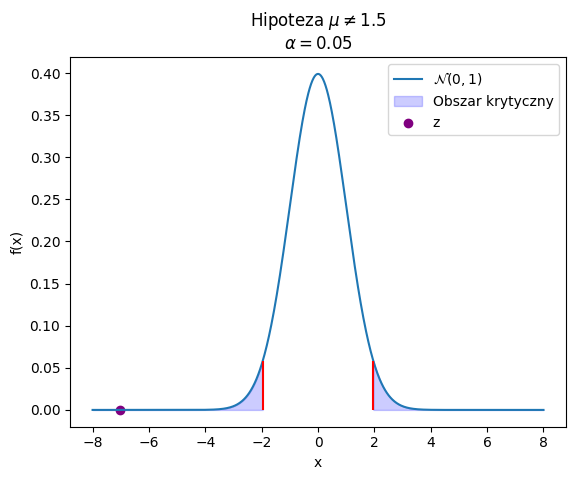

-z(1-a/2)=-1.959963984540054


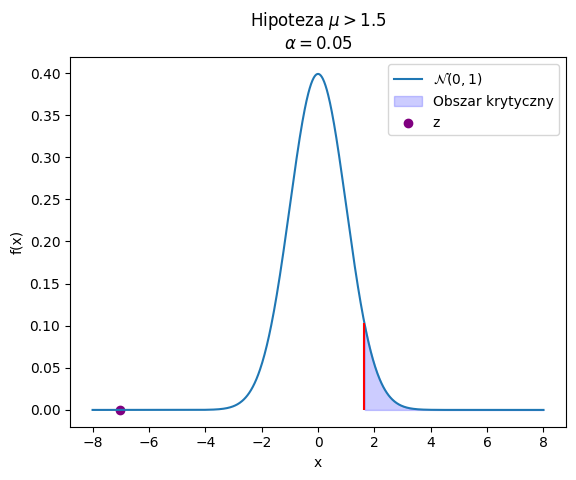

z(1-a)=1.6448536269514722


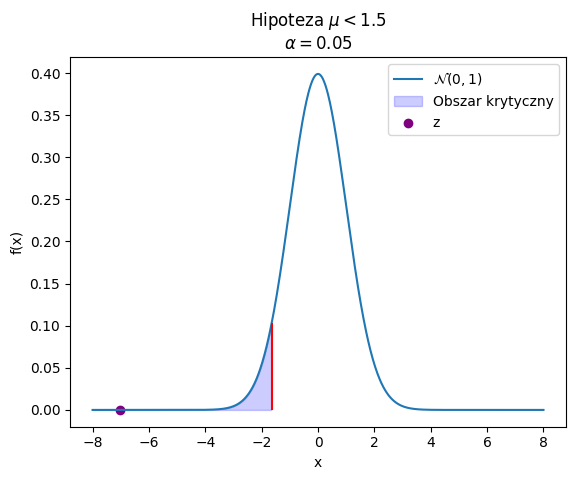

-7.041450899607091
1.9024781749976682e-12
0.9999999999990488
9.51241291241344e-13


In [10]:
zadanie1(X,0.2,1.5,0.05)

$z(1-a/2)=1.6448536269514722


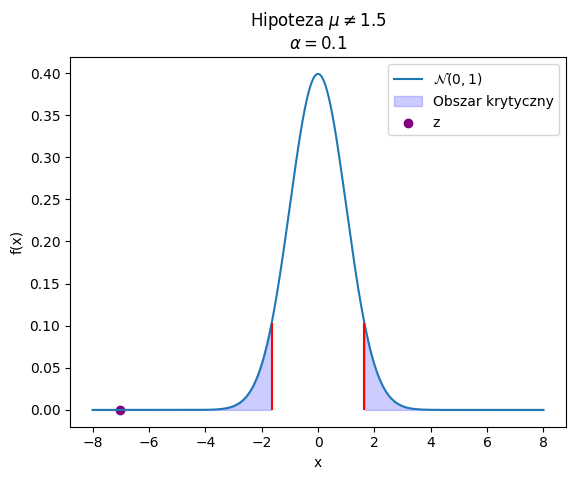

-z(1-a/2)=-1.6448536269514722


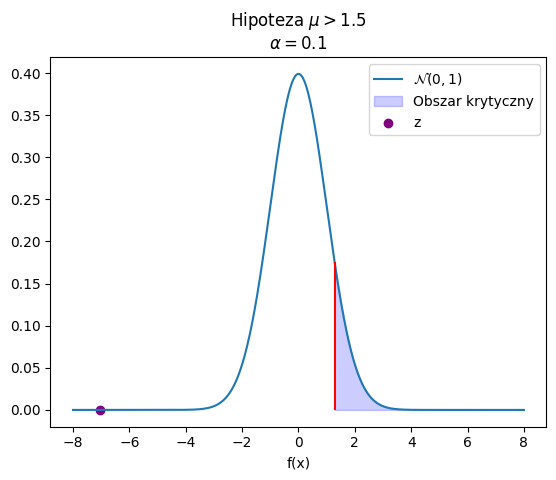

z(1-a)=1.2815515655446004


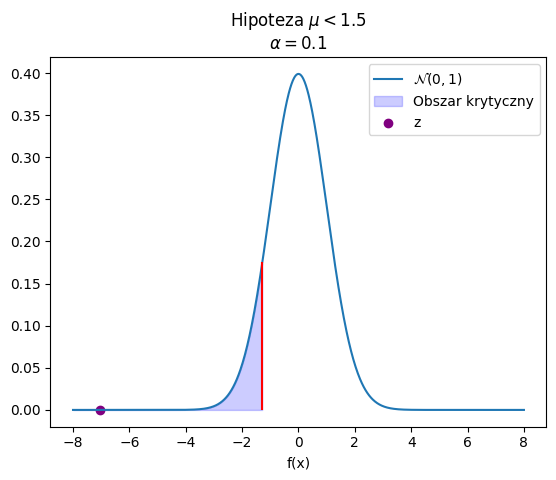

-7.041450899607091
1.9024781749976682e-12
0.9999999999990488
9.51241291241344e-13


In [31]:
zadanie1(X,0.2,1.5,0.1)

$z(1-a/2)=2.5758293035489004


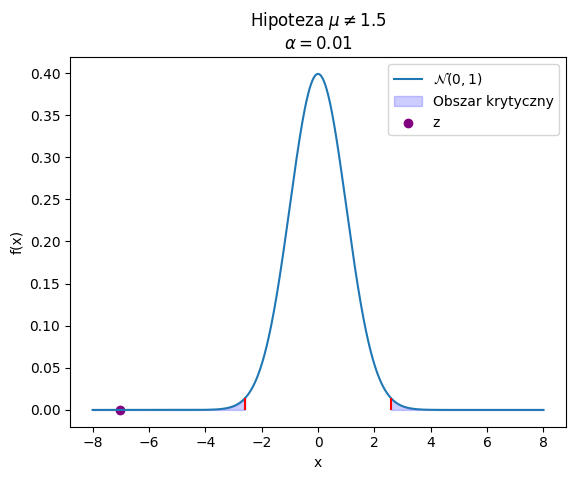

-z(1-a/2)=-2.5758293035489004


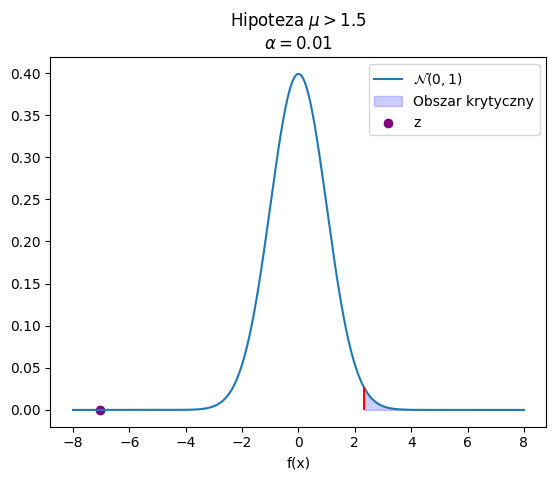

z(1-a)=2.3263478740408408


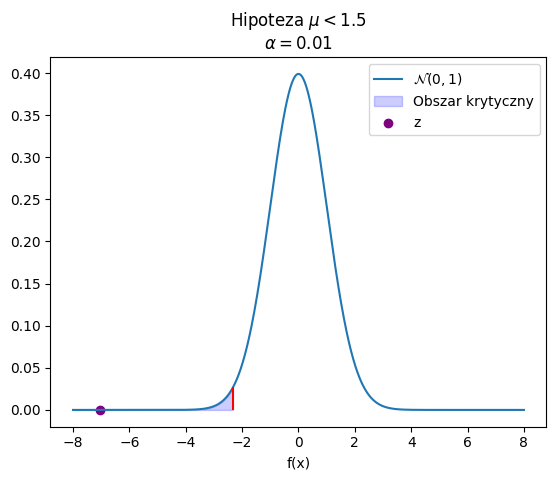

-7.041450899607091
1.9024781749976682e-12
0.9999999999990488
9.51241291241344e-13


In [32]:
zadanie1(X,0.2,1.5,0.01)

In [13]:
def zadanie2(Y,mi,H0,alfa):
    sr=np.mean(Y)
    n=len(Y)
    var=1/(n-1)*np.sum([(y-sr)**2 for y in Y])
    chi=(n-1)*var/(H0)
    t=np.linspace(700,1300,1000)
    y=[scipy.stats.chi2.pdf(i,n-1) for i in t]
    plt.plot(t,y,label=r"$\chi^2$ z 999 st. swobody")
    print(f"1-alfa/2={scipy.stats.chi2.ppf(1 - alfa / 2,n-1)}")
    print(f"a/2={scipy.stats.chi2.ppf(alfa / 2,n-1)}")
    plt.vlines(x=scipy.stats.chi2.ppf(1 - alfa / 2,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(1 - alfa / 2,n-1),n-1), color="red")
    plt.vlines(x=scipy.stats.chi2.ppf(alfa / 2,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(alfa / 2,n-1),n-1), color="red")
    plt.fill_between(x=t, y1=y, where=(t <= scipy.stats.chi2.ppf(alfa / 2,n-1)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.fill_between(x=t, y1=y, where=(t >= scipy.stats.chi2.ppf(1-alfa / 2,n-1)), color="b", alpha=0.2)
    plt.scatter(chi,0,color="purple",label=r'$\chi^2$')
    plt.title(r"Hipoteza $\sigma \neq$" + str(H0) + '\n' + r"$\alpha =$" + str(alfa))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()
    
    plt.plot(t,y,label=r"$\chi^2$ z 999 st. swobody")
    print(f"1-a={scipy.stats.chi2.ppf(1-alfa,n-1)}")
    plt.vlines(x=scipy.stats.chi2.ppf(1-alfa,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(1-alfa,n-1),n-1), color="red")
    plt.fill_between(x=t, y1=y, where=(t > scipy.stats.chi2.ppf(1-alfa,n-1)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(chi,0,color="purple",label=r'$\chi^2$')
    plt.title(r"Hipoteza $\sigma >$" + str(H0) + '\n' + r"$\alpha =$" + str(alfa))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()
    
    plt.plot(t,y,label=r"$\chi^2$ z 999 st. swobody")
    print(f"a={scipy.stats.chi2.ppf(alfa,n-1)}")
    plt.vlines(x=scipy.stats.chi2.ppf(alfa,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(alfa,n-1),n-1), color="red")
    plt.fill_between(x=t, y1=y, where=(t < scipy.stats.chi2.ppf(alfa,n-1)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(chi,0,color="purple",label=r'$\chi^2$')
    plt.title(r"Hipoteza $\sigma <$" + str(H0) + '\n' + r"$\alpha =$" + str(alfa))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()
    print(chi)
    print(2*scipy.stats.chi2.cdf(chi,n-1))
    print(1-scipy.stats.chi2.cdf(chi,n-1))
    print(scipy.stats.chi2.cdf(chi,n-1))

1-alfa/2=1088.4870677259353
a/2=913.3009983021134


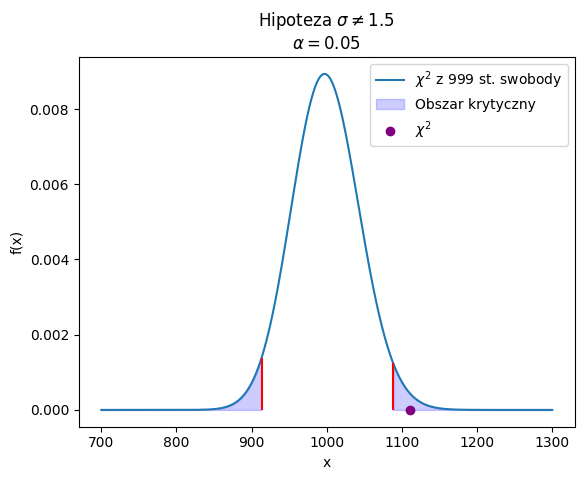

1-a=1073.6426506574246


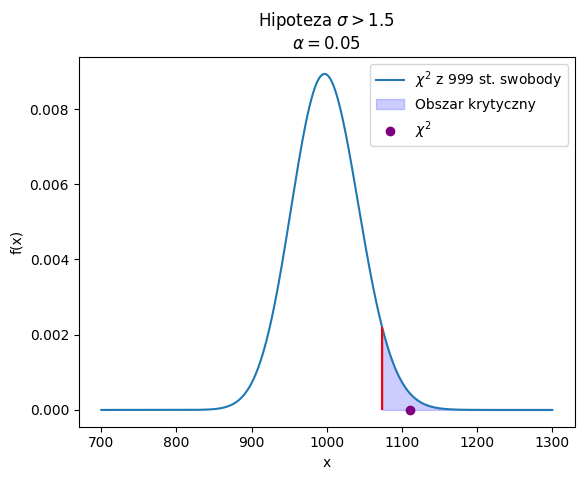

a=926.6311609204329


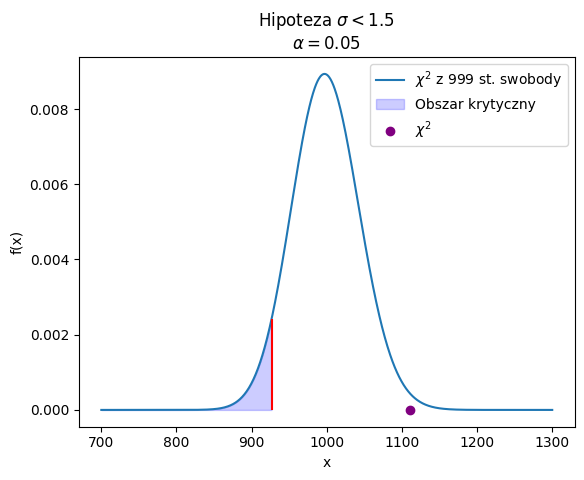

1110.968448901507
1.9849767475121654
0.007511626243917324
0.9924883737560827


In [14]:
zadanie2(Y,0.2,1.5,0.05)

# Zadanie 3 - błąd I rodzaju

In [2]:
alfa = 0.05
alfa2 = 0.1
alfa3 = 0.01
n = 10**3
H0 = 1.5
sigma = 0.2
mu = 0.2
N = 10**3

# 1 - dla $\mu$

# $\mu \neq 1.5$

In [9]:
def zadanie3_1a(alfa, n, N, H0, sigma):
    
    # mi != 1.5

    accepted = 0
    for i in range(N):
        X_ = np.random.normal(H0, sigma, size = n)
        sr = np.mean(X_)
        Z = (sr - H0) / sigma * np.sqrt(n)

        x = scipy.stats.norm.ppf(1-alfa/2)
        if Z <= -x or Z >= x:
            accepted += 1
    # print(x)
    false_positive = accepted / N

    return false_positive


In [39]:
zadanie3_1a(alfa,n,N,H0,sigma)
zadanie3_1a(alfa2,n,N,H0,sigma)
zadanie3_1a(alfa3,n,N,H0,sigma)

1.959963984540054
1.6448536269514722
2.5758293035489004


0.009

# $\mu > 1.5$

In [8]:
def zadanie3_1b(alfa, n, N, H0, sigma):
    
    # mi > 1.5

    accepted = 0
    for i in range(N):
        X_ = np.random.normal(H0, sigma, size = n)
        sr = np.mean(X_)
        Z = (sr - H0) / sigma * np.sqrt(n)

        x = scipy.stats.norm.ppf(1-alfa)
        if Z >= x:
            accepted += 1
    # print(x)
    false_positive = accepted / N

    return false_positive


In [37]:
zadanie3_1b(alfa,n,N,H0,sigma)
zadanie3_1b(alfa2,n,N,H0,sigma)
zadanie3_1b(alfa3,n,N,H0,sigma)

1.6448536269514722
1.2815515655446004
2.3263478740408408


0.008

# $\mu < 1.5$

In [7]:
def zadanie3_1c(alfa, n, N, H0, sigma):
    
    # mi < 1.5

    accepted = 0
    for i in range(N):
        X_ = np.random.normal(H0, sigma, size = n)
        sr = np.mean(X_)
        Z = (sr - H0) / sigma * np.sqrt(n)

        x = -scipy.stats.norm.ppf(1-alfa)
        if Z <= x:
            accepted += 1
    # print(x)
    
    false_positive = accepted / N

    return false_positive


In [35]:
zadanie3_1c(alfa,n,N,H0,sigma)
zadanie3_1c(alfa2,n,N,H0,sigma)
zadanie3_1c(alfa3,n,N,H0,sigma)

-1.6448536269514722
-1.2815515655446004
-2.3263478740408408


0.009

# $\mu \neq 1.5, \quad \alpha = 0.05$

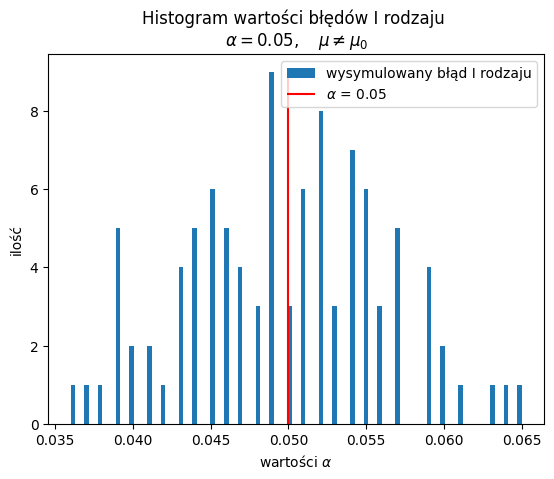

In [101]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1a(alfa,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha$ = {}'.format(alfa))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu \neq \mu_0$'.format(alfa))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu \neq 1.5, \quad \alpha = 0.1$

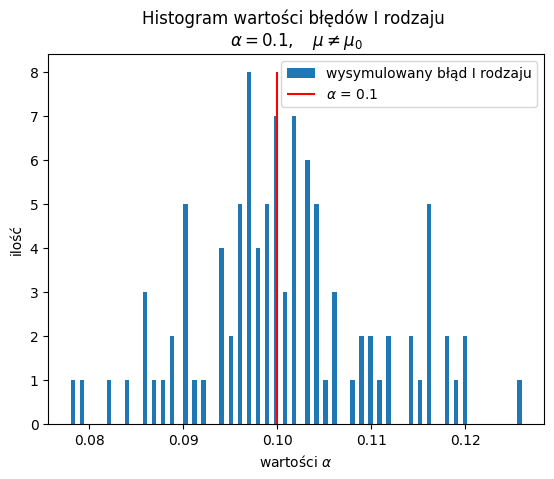

In [102]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1a(alfa2,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa2, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha$ = {}'.format(alfa2))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu \neq \mu_0$'.format(alfa2))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu \neq 1.5, \quad \alpha = 0.01$

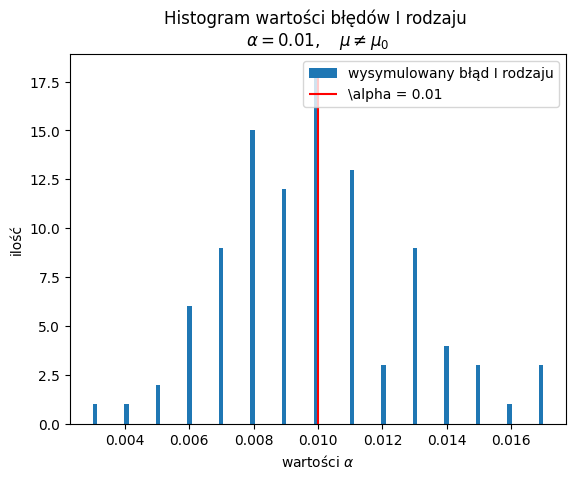

In [103]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1a(alfa3,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa3, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'\alpha = {}'.format(alfa3))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu \neq \mu_0$'.format(alfa3))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu \neq 1.5$ - boxploty

0.05085
0.09941000000000001
0.00962
0.05
0.099
0.01


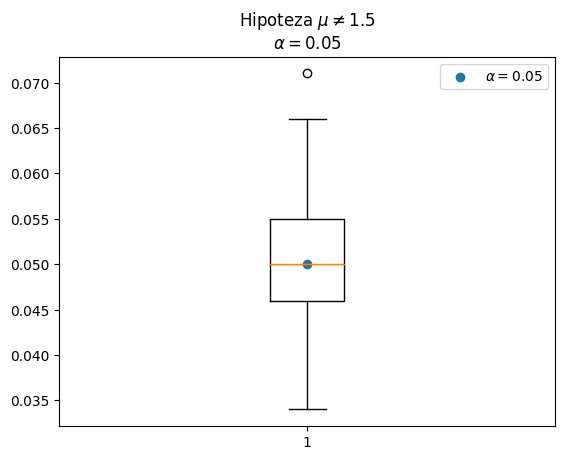

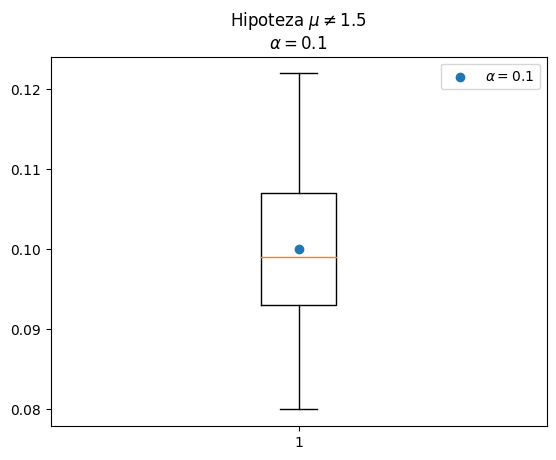

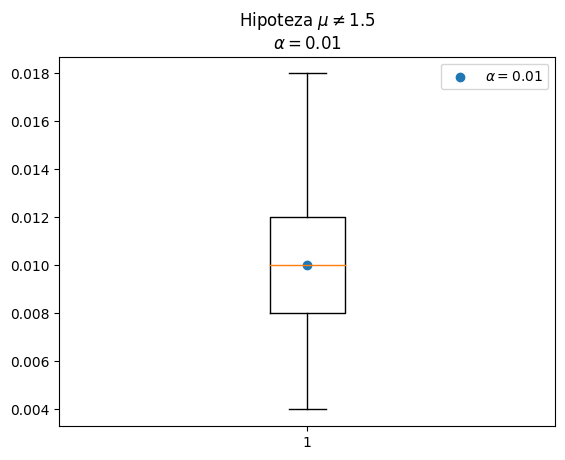

In [10]:
M = 100

alfa_list1 = []
alfa_list2 = []
alfa_list3 = []
for i in range(M):
    a1 = zadanie3_1a(alfa,n,N,H0,sigma)
    alfa_list1.append(a1)

    a2 = zadanie3_1a(alfa2,n,N,H0,sigma)
    alfa_list2.append(a2)

    a3 = zadanie3_1a(alfa3,n,N,H0,sigma)
    alfa_list3.append(a3)

print(np.mean(alfa_list1))
print(np.mean(alfa_list2))
print(np.mean(alfa_list3))

print(statistics.median(alfa_list1))
print(statistics.median(alfa_list2))
print(statistics.median(alfa_list3))

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list1)
plt.legend()
plt.title(r'Hipoteza $\mu \neq 1.5$' + '\n' + r'$\alpha = 0.05$')
plt.show()

plt.scatter(1, alfa2, label = r'$\alpha = {}$'.format(alfa2))
plt.boxplot(alfa_list2)
plt.legend()
plt.title(r'Hipoteza $\mu \neq 1.5$' + '\n' + r'$\alpha = 0.1$')
plt.show()

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list3)
plt.legend()
plt.title(r'Hipoteza $\mu \neq 1.5$' + '\n' + r'$\alpha = 0.01$')
plt.show()

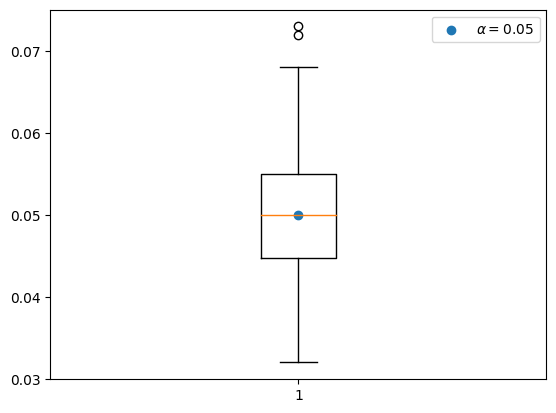

In [112]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1a(alfa,n,N,H0,sigma)
    alfa_list.append(a)

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list)
plt.legend()
plt.show()

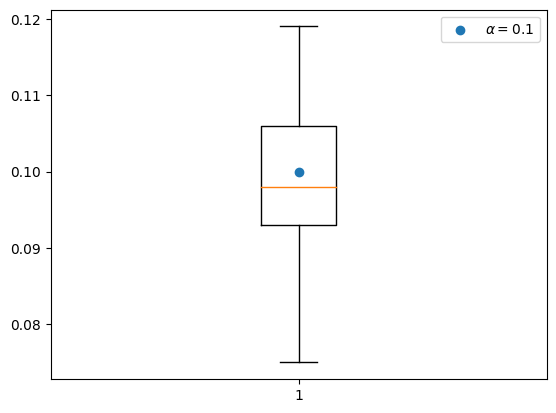

In [107]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1a(alfa2,n,N,H0,sigma)
    alfa_list.append(a)

plt.scatter(1, alfa2, label = r'$\alpha = {}$'.format(alfa2))
plt.boxplot(alfa_list)
plt.legend()
plt.show()

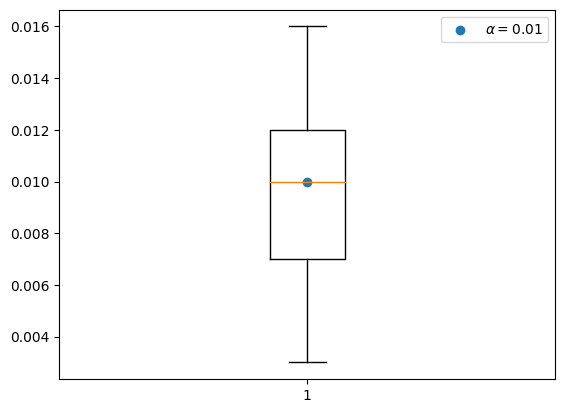

In [109]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1a(alfa3,n,N,H0,sigma)
    alfa_list.append(a)

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list)
plt.legend()
plt.show()

# $\mu > 1.5, \quad \alpha = 0.05$

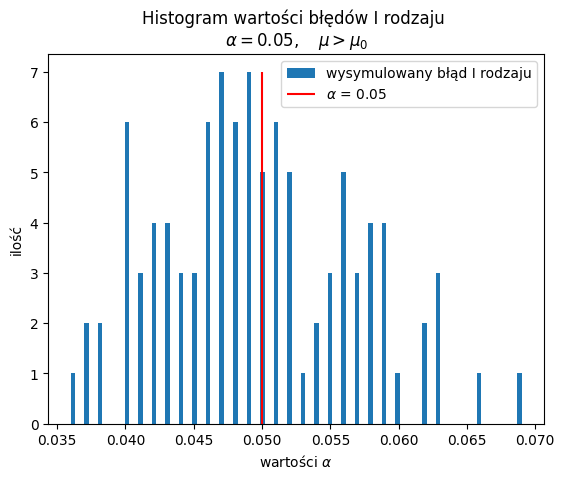

In [114]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1b(alfa,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha$ = {}'.format(alfa))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu > \mu_0$'.format(alfa))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu > 1.5, \quad \alpha = 0.1$

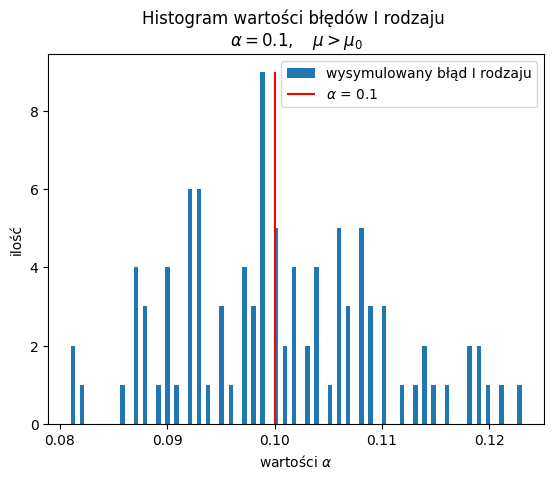

In [116]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1b(alfa2,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa2, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha$ = {}'.format(alfa2))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu > \mu_0$'.format(alfa2))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu > 1.5, \quad \alpha = 0.01$

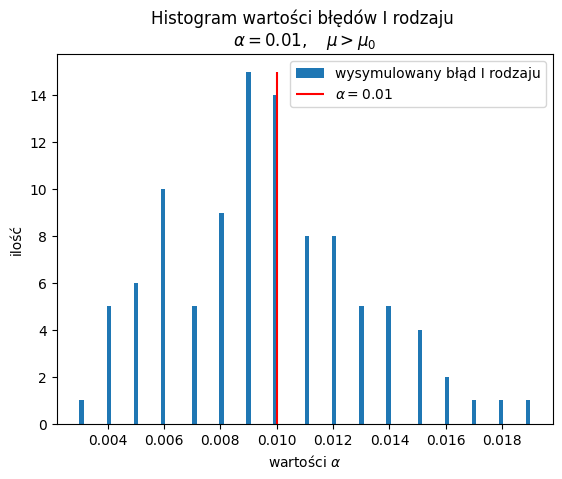

In [118]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1b(alfa3,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa3, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha = {}$'.format(alfa3))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu > \mu_0$'.format(alfa3))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu > 1.5$ - boxploty

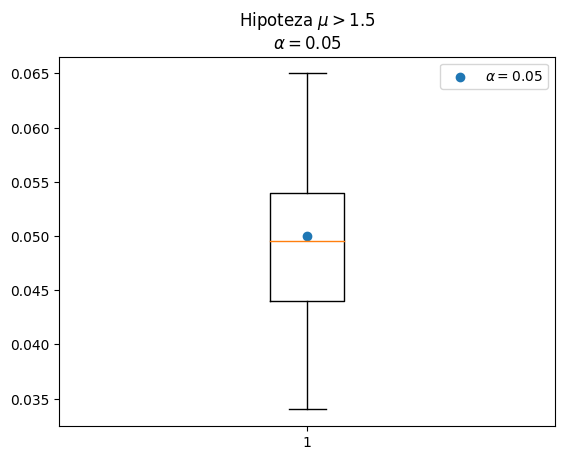

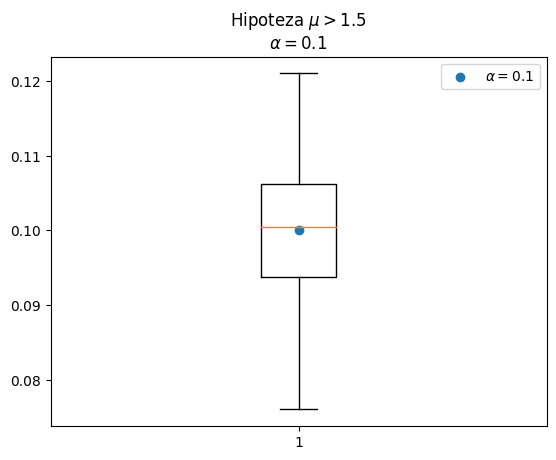

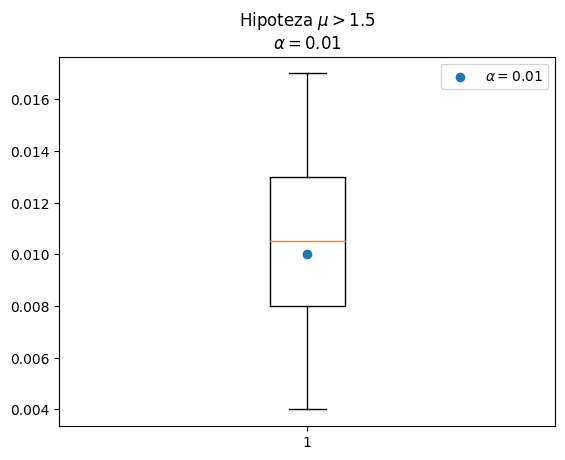

In [28]:
M = 100

alfa_list1 = []
alfa_list2 = []
alfa_list3 = []
for i in range(M):
    a1 = zadanie3_1b(alfa,n,N,H0,sigma)
    alfa_list1.append(a1)

    a2 = zadanie3_1b(alfa2,n,N,H0,sigma)
    alfa_list2.append(a2)

    a3 = zadanie3_1b(alfa3,n,N,H0,sigma)
    alfa_list3.append(a3)

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list1)
plt.legend()
plt.title(r'Hipoteza $\mu > 1.5$' + '\n' + r'$\alpha = 0.05$')
plt.show()

plt.scatter(1, alfa2, label = r'$\alpha = {}$'.format(alfa2))
plt.boxplot(alfa_list2)
plt.legend()
plt.title(r'Hipoteza $\mu > 1.5$' + '\n' + r'$\alpha = 0.1$')
plt.show()

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list3)
plt.legend()
plt.title(r'Hipoteza $\mu > 1.5$' + '\n' + r'$\alpha = 0.01$')
plt.show()

# $\mu < 1.5, \quad \alpha = 0.05$

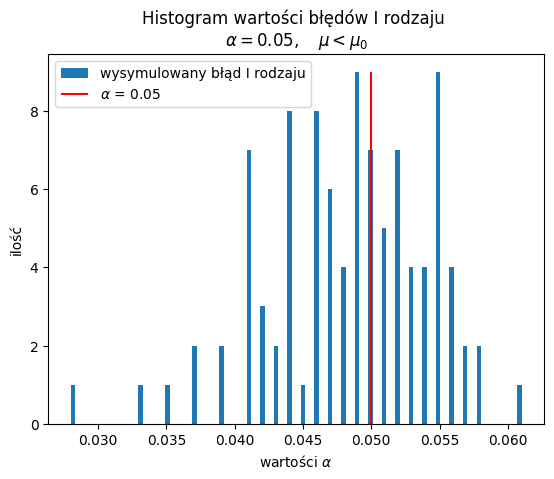

In [153]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1c(alfa,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha$ = {}'.format(alfa))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu < \mu_0$'.format(alfa))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu < 1.5, \quad \alpha = 0.1$

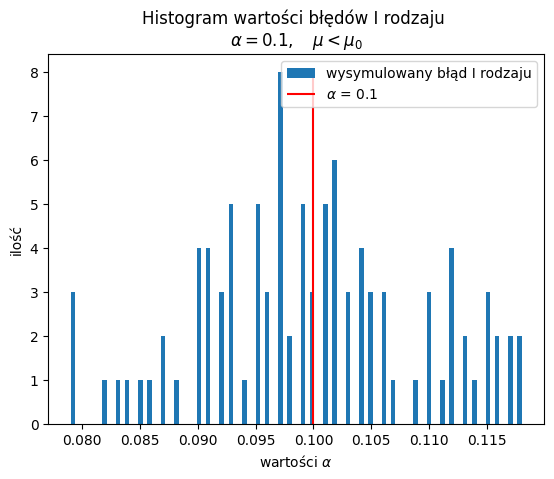

In [156]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1c(alfa2,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa2, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha$ = {}'.format(alfa2))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu < \mu_0$'.format(alfa2))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu < 1.5, \quad \alpha = 0.01$

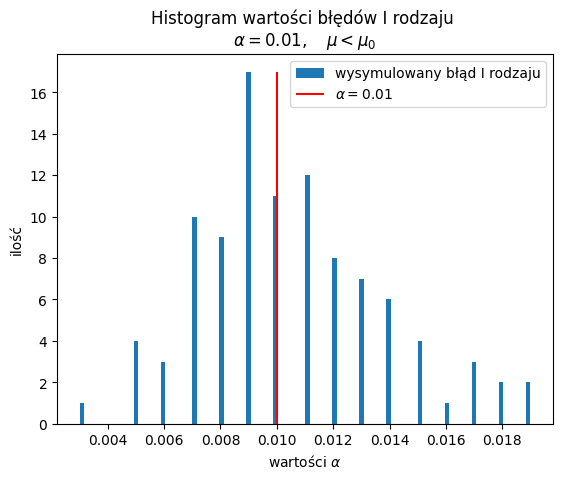

In [157]:
M = 100

alfa_list = []
for i in range(M):
    a = zadanie3_1c(alfa3,n,N,H0,sigma)
    alfa_list.append(a)

plt.hist(alfa_list, bins=M, label = r'wysymulowany błąd I rodzaju')
plt.vlines(alfa3, 0, alfa_list.count(mode(alfa_list)), color = 'r', label = r'$\alpha = {}$'.format(alfa3))
plt.title('Histogram wartości błędów I rodzaju \n' + r'$\alpha = {}, \quad \mu < \mu_0$'.format(alfa3))
plt.xlabel(r'wartości $\alpha$')
plt.ylabel('ilość')
plt.legend()
plt.show()

# $\mu < 1.5$ - boxploty

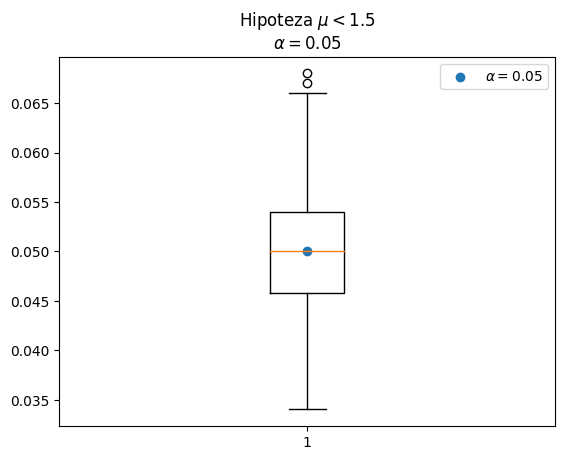

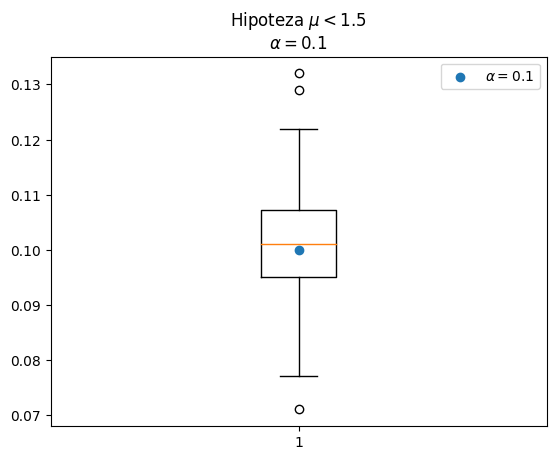

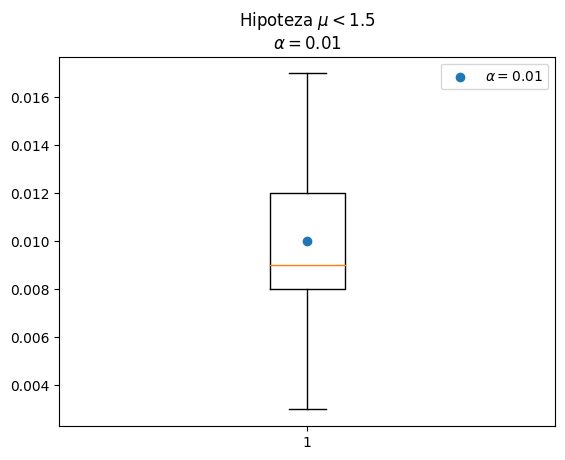

In [26]:
M = 100

alfa_list1 = []
alfa_list2 = []
alfa_list3 = []
for i in range(M):
    a1 = zadanie3_1c(alfa,n,N,H0,sigma)
    alfa_list1.append(a1)

    a2 = zadanie3_1c(alfa2,n,N,H0,sigma)
    alfa_list2.append(a2)

    a3 = zadanie3_1c(alfa3,n,N,H0,sigma)
    alfa_list3.append(a3)

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list1)
plt.legend()
plt.title(r'Hipoteza $\mu < 1.5$' + '\n' + r'$\alpha = 0.05$')
plt.show()

plt.scatter(1, alfa2, label = r'$\alpha = {}$'.format(alfa2))
plt.boxplot(alfa_list2)
plt.legend()
plt.title(r'Hipoteza $\mu < 1.5$' + '\n' + r'$\alpha = 0.1$')
plt.show()

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list3)
plt.legend()
plt.title(r'Hipoteza $\mu < 1.5$' + '\n' + r'$\alpha = 0.01$')
plt.show()

# 2 - dla $\sigma^2$

# $\sigma^2 \neq 1.5$

In [40]:
def zadanie3_2a(alfa, n, N, H0, mu):
    
    # sigma^2 != 1.5

    accepted = 0
    for i in range(N):
        X_ = np.random.normal(mu, H0, size = n)
        var = np.var(X_)
        Chi2 = (n-1)*var / H0**2

        x1 = scipy.stats.chi2.ppf(alfa / 2,n-1)
        x2 = scipy.stats.chi2.ppf(1 - alfa / 2,n-1)
        if Chi2 <= x1 or Chi2 >= x2:
            accepted += 1
    print(x1, x2)
    false_positive = accepted / N

    return false_positive

In [42]:
zadanie3_2a(alfa,n,N,H0,mu)
zadanie3_2a(alfa2,n,N,H0,mu)
zadanie3_2a(alfa3,n,N,H0,mu)

913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641


0.015

# $\sigma^2 > 1.5$

In [43]:
def zadanie3_2b(alfa, n, N, H0, mu):
    
    # sigma^2 > 1.5

    accepted = 0
    for i in range(N):
        X_ = np.random.normal(mu, H0, size = n)
        var = np.var(X_)
        Chi2 = (n-1)*var / H0**2

        x = scipy.stats.chi2.ppf(1-alfa,n-1)
        if Chi2 >= x:
            accepted += 1
    print(x)
    false_positive = accepted / N

    return false_positive

In [46]:
zadanie3_2b(alfa,n,N,H0,mu)
zadanie3_2b(alfa2,n,N,H0,mu)
zadanie3_2b(alfa3,n,N,H0,mu)

1073.6426506574246
1056.6952292962342
1105.9169575045823


0.01

# $\sigma^2 < 1.5$

In [47]:
def zadanie3_2c(alfa, n, N, H0, mu):
    
    # sigma^2 < 1.5

    accepted = 0
    for i in range(N):
        X_ = np.random.normal(mu, H0, size = n)
        var = np.var(X_)
        Chi2 = (n-1)*var / H0**2

        x = scipy.stats.chi2.ppf(alfa,n-1)
        if Chi2 <= x:
            accepted += 1
    print(x)
    false_positive = accepted / N

    return false_positive

In [48]:
zadanie3_2c(alfa,n,N,H0,mu)
zadanie3_2c(alfa2,n,N,H0,mu)
zadanie3_2c(alfa3,n,N,H0,mu)

926.6311609204329
942.1612343926897
897.9644826908501


0.009

# $\sigma^2 \neq 1.5$

913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.3009983021134 1088.4870677259353
926.6311609204329 1073.6426506574246
887.6211352175186 1117.890452678641
913.300998

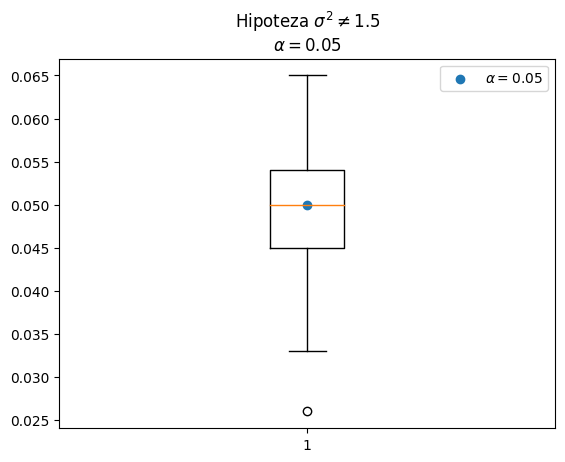

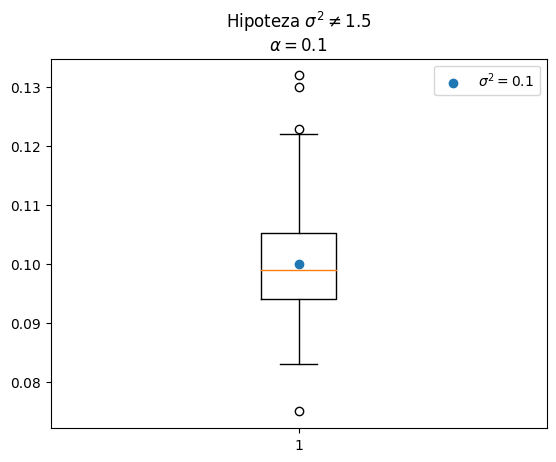

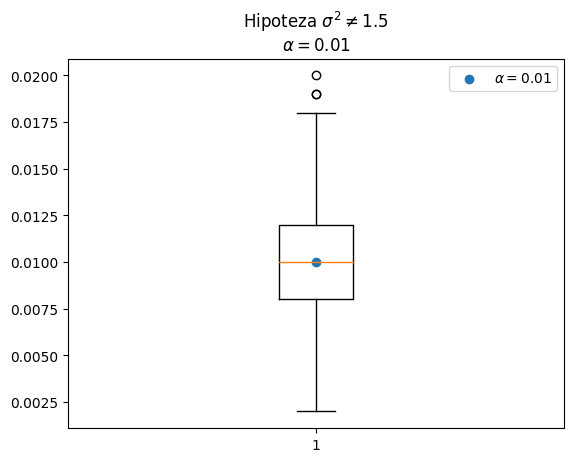

In [50]:
M = 100

alfa_list1 = []
alfa_list2 = []
alfa_list3 = []
for i in range(M):
    a1 = zadanie3_2a(alfa,n,N,H0,mu)
    alfa_list1.append(a1)

    a2 = zadanie3_2a(alfa2,n,N,H0,mu)
    alfa_list2.append(a2)

    a3 = zadanie3_2a(alfa3,n,N,H0,mu)
    alfa_list3.append(a3)

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list1)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 \neq 1.5$' + '\n' + r'$\alpha = 0.05$')
plt.show()

plt.scatter(1, alfa2, label = r'$\sigma^2 = {}$'.format(alfa2))
plt.boxplot(alfa_list2)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 \neq 1.5$' + '\n' + r'$\alpha = 0.1$')
plt.show()

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list3)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 \neq 1.5$' + '\n' + r'$\alpha = 0.01$')
plt.show()

# $\sigma^2 > 1.5$

1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292962342
1105.9169575045823
1073.6426506574246
1056.6952292

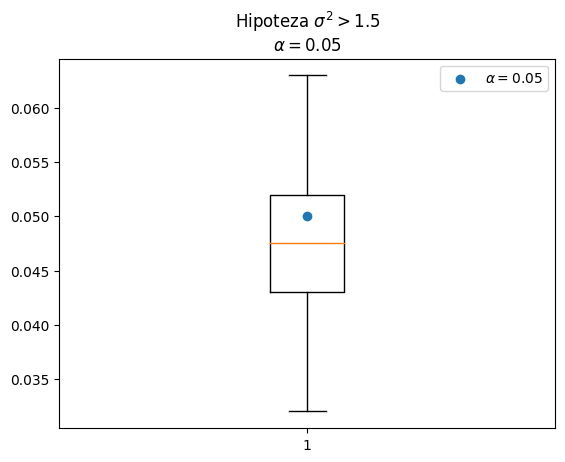

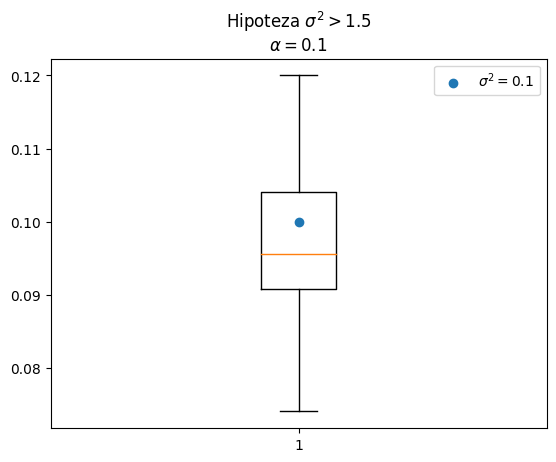

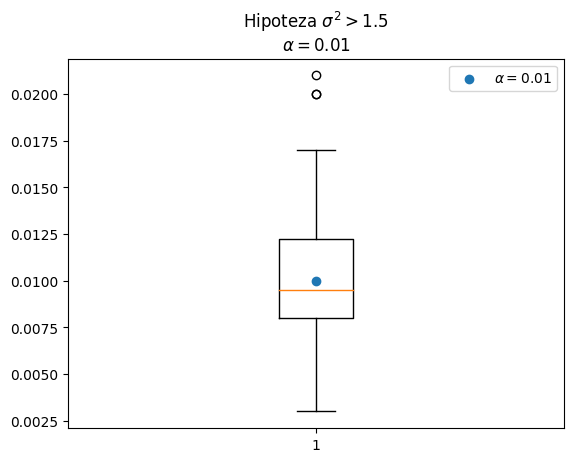

In [51]:
M = 100

alfa_list1 = []
alfa_list2 = []
alfa_list3 = []
for i in range(M):
    a1 = zadanie3_2b(alfa,n,N,H0,mu)
    alfa_list1.append(a1)

    a2 = zadanie3_2b(alfa2,n,N,H0,mu)
    alfa_list2.append(a2)

    a3 = zadanie3_2b(alfa3,n,N,H0,mu)
    alfa_list3.append(a3)

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list1)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 > 1.5$' + '\n' + r'$\alpha = 0.05$')
plt.show()

plt.scatter(1, alfa2, label = r'$\sigma^2 = {}$'.format(alfa2))
plt.boxplot(alfa_list2)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 > 1.5$' + '\n' + r'$\alpha = 0.1$')
plt.show()

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list3)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 > 1.5$' + '\n' + r'$\alpha = 0.01$')
plt.show()

# $\sigma^2 < 1.5$

926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.1612343926897
897.9644826908501
926.6311609204329
942.161234

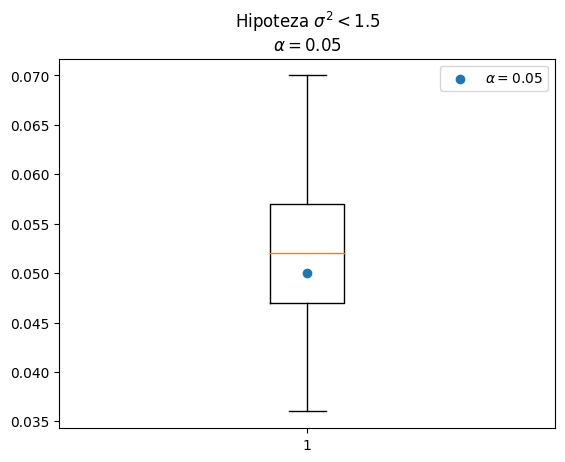

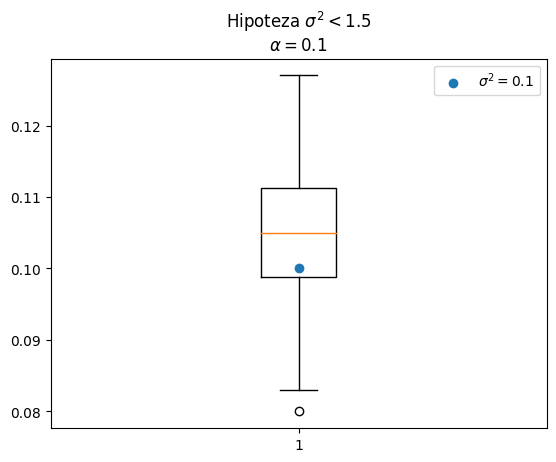

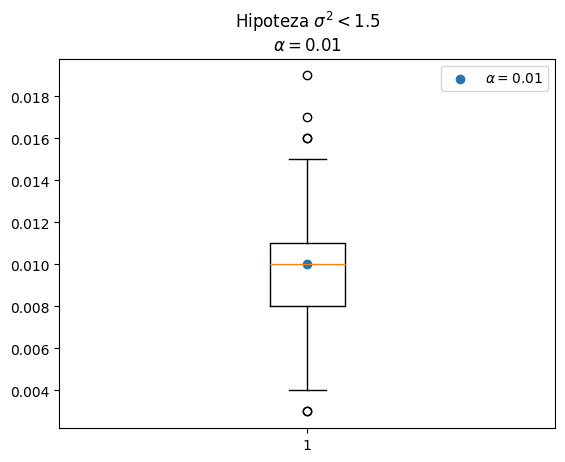

In [53]:
M = 100

alfa_list1 = []
alfa_list2 = []
alfa_list3 = []
for i in range(M):
    a1 = zadanie3_2c(alfa,n,N,H0,mu)
    alfa_list1.append(a1)

    a2 = zadanie3_2c(alfa2,n,N,H0,mu)
    alfa_list2.append(a2)

    a3 = zadanie3_2c(alfa3,n,N,H0,mu)
    alfa_list3.append(a3)

plt.scatter(1, alfa, label = r'$\alpha = {}$'.format(alfa))
plt.boxplot(alfa_list1)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 < 1.5$' + '\n' + r'$\alpha = 0.05$')
plt.show()

plt.scatter(1, alfa2, label = r'$\sigma^2 = {}$'.format(alfa2))
plt.boxplot(alfa_list2)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 < 1.5$' + '\n' + r'$\alpha = 0.1$')
plt.show()

plt.scatter(1, alfa3, label = r'$\alpha = {}$'.format(alfa3))
plt.boxplot(alfa_list3)
plt.legend()
plt.title(r'Hipoteza $\sigma^2 < 1.5$' + '\n' + r'$\alpha = 0.01$')
plt.show()

# Zadanie 3 - błąd II rodzaju

In [4]:
alfa = 0.05
sigma = 0.2
mu = 0.2
n = 10**3
N = 10**3
H0 = 1.5

# 1 - dla $\mu$

# $\mu \neq 1.5$

In [3]:
# H1_1 = [1.45, 1.455, 1.46, 1.465, 1.47, 1.475, 1.48, 1.485, 1.49, 1.495, 1.51, 1.515, 1.52, 1.525, 1.53, 1.535, 1.54, 1.545, 1.55]
H1_1 = np.linspace(1.4,1.6,100)

def zadanie4_1a(alfa, H1, sigma, n, N):
    # mu != 1.5
    rejected = 0
    for i in range(N):
        X_ = np.random.normal(H1, sigma, size = n)
        sr = np.mean(X_)
        Z = (sr - H0) / sigma * np.sqrt(n)
        x = scipy.stats.norm.ppf(1-alfa/2)
        if Z >= -x and Z <= x:
            rejected += 1
    
    false_negative = rejected / N

    return false_negative

In [5]:
H1_list = []
for H in H1_1:
    h = zadanie4_1a(alfa,H,sigma,n,N)
    H1_list.append(h)
    print(H, h)

1.4 0.0
1.402020202020202 0.0
1.404040404040404 0.0
1.406060606060606 0.0
1.408080808080808 0.0
1.41010101010101 0.0
1.412121212121212 0.0
1.4141414141414141 0.0
1.4161616161616162 0.0
1.4181818181818182 0.0
1.4202020202020202 0.0
1.422222222222222 0.0
1.424242424242424 0.0
1.4262626262626261 0.0
1.4282828282828282 0.0
1.4303030303030302 0.0
1.4323232323232322 0.0
1.4343434343434343 0.0
1.4363636363636363 0.0
1.4383838383838383 0.0
1.4404040404040404 0.0
1.4424242424242424 0.0
1.4444444444444444 0.0
1.4464646464646465 0.0
1.4484848484848485 0.0
1.4505050505050505 0.0
1.4525252525252526 0.0
1.4545454545454546 0.0
1.4565656565656566 0.0
1.4585858585858587 0.0
1.4606060606060605 0.0
1.4626262626262625 0.0
1.4646464646464645 0.001
1.4666666666666666 0.001
1.4686868686868686 0.0
1.4707070707070706 0.002
1.4727272727272727 0.009
1.4747474747474747 0.02
1.4767676767676767 0.054
1.4787878787878788 0.079
1.4808080808080808 0.149
1.4828282828282828 0.204
1.4848484848484849 0.351
1.48686868686868

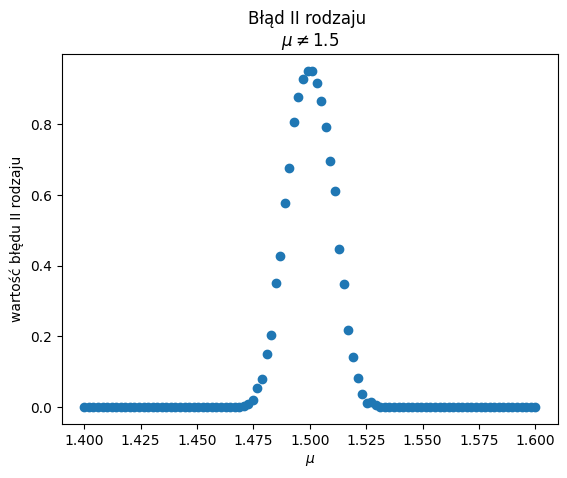

In [6]:
plt.scatter(H1_1, H1_list)
plt.xlabel(r'$\mu$')
plt.ylabel('wartość błędu II rodzaju')
plt.title('Błąd II rodzaju \n' + r'$\mu \neq 1.5$')
plt.show()

# $\mu > 1.5$

In [7]:
# H1_2 = [1.51, 1.515, 1.52, 1.525, 1.53, 1.535, 1.54, 1.545, 1.55]
H1_2 = np.linspace(1.4,1.6,100)

def zadanie4_1b(alfa, H1, sigma, n, N):
    # mu > 1.5
    rejected = 0
    for i in range(N):
        X_ = np.random.normal(H1, sigma, size = n)
        sr = np.mean(X_)
        Z = (sr - H0) / sigma * np.sqrt(n)
        x = scipy.stats.norm.ppf(1-alfa)
        if Z < x:
            rejected += 1

    false_negative = rejected / N

    return false_negative

In [8]:
H2_list = []
for H in H1_2:
    h = zadanie4_1b(alfa,H,sigma,n,N)
    H2_list.append(h)
    print(H, h)

1.4 1.0
1.402020202020202 1.0
1.404040404040404 1.0
1.406060606060606 1.0
1.408080808080808 1.0
1.41010101010101 1.0
1.412121212121212 1.0
1.4141414141414141 1.0
1.4161616161616162 1.0
1.4181818181818182 1.0
1.4202020202020202 1.0
1.422222222222222 1.0
1.424242424242424 1.0
1.4262626262626261 1.0
1.4282828282828282 1.0
1.4303030303030302 1.0
1.4323232323232322 1.0
1.4343434343434343 1.0
1.4363636363636363 1.0
1.4383838383838383 1.0
1.4404040404040404 1.0
1.4424242424242424 1.0
1.4444444444444444 1.0
1.4464646464646465 1.0
1.4484848484848485 1.0
1.4505050505050505 1.0
1.4525252525252526 1.0
1.4545454545454546 1.0
1.4565656565656566 1.0
1.4585858585858587 1.0
1.4606060606060605 1.0
1.4626262626262625 1.0
1.4646464646464645 1.0
1.4666666666666666 1.0
1.4686868686868686 1.0
1.4707070707070706 1.0
1.4727272727272727 1.0
1.4747474747474747 1.0
1.4767676767676767 1.0
1.4787878787878788 1.0
1.4808080808080808 1.0
1.4828282828282828 1.0
1.4848484848484849 1.0
1.486868686868687 1.0
1.48888888888

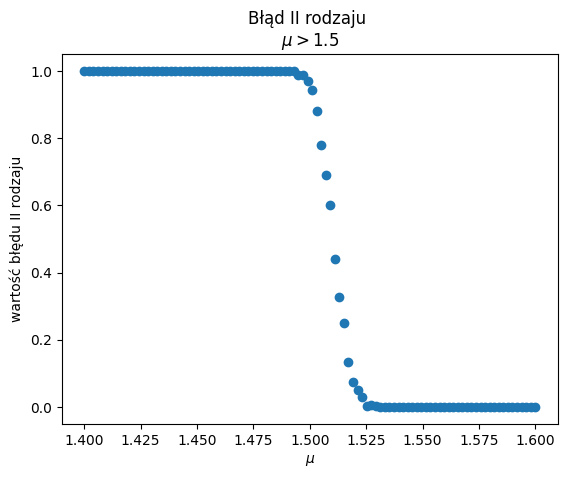

In [9]:
plt.scatter(H1_2, H2_list)
plt.xlabel(r'$\mu$')
plt.ylabel('wartość błędu II rodzaju')
plt.title('Błąd II rodzaju \n' + r'$\mu > 1.5$')
plt.show()

# $\mu < 1.5$

In [10]:
# H1_3 = [1.45, 1.455, 1.46, 1.465, 1.47, 1.475, 1.48, 1.485, 1.49, 1.495]
H1_3 = np.linspace(1.4,1.6,100)

def zadanie4_1c(alfa, H1, sigma, n, N):
    # mu < 1.5
    rejected = 0
    for i in range(N):
        X_ = np.random.normal(H1, sigma, size = n)
        sr = np.mean(X_)
        Z = (sr - H0) / sigma * np.sqrt(n)
        x = -scipy.stats.norm.ppf(1 - alfa)
        if Z > x:
            rejected += 1

    false_negative = rejected / N

    return false_negative

In [11]:
H3_list = []
for H in H1_3:
    h = zadanie4_1c(alfa,H,sigma,n,N)
    H3_list.append(h)
    print(H, h)

1.4 0.0
1.402020202020202 0.0
1.404040404040404 0.0
1.406060606060606 0.0
1.408080808080808 0.0
1.41010101010101 0.0
1.412121212121212 0.0
1.4141414141414141 0.0
1.4161616161616162 0.0
1.4181818181818182 0.0
1.4202020202020202 0.0
1.422222222222222 0.0
1.424242424242424 0.0
1.4262626262626261 0.0
1.4282828282828282 0.0
1.4303030303030302 0.0
1.4323232323232322 0.0
1.4343434343434343 0.0
1.4363636363636363 0.0
1.4383838383838383 0.0
1.4404040404040404 0.0
1.4424242424242424 0.0
1.4444444444444444 0.0
1.4464646464646465 0.0
1.4484848484848485 0.0
1.4505050505050505 0.0
1.4525252525252526 0.0
1.4545454545454546 0.0
1.4565656565656566 0.0
1.4585858585858587 0.0
1.4606060606060605 0.0
1.4626262626262625 0.0
1.4646464646464645 0.0
1.4666666666666666 0.001
1.4686868686868686 0.0
1.4707070707070706 0.001
1.4727272727272727 0.003
1.4747474747474747 0.007
1.4767676767676767 0.015
1.4787878787878788 0.05
1.4808080808080808 0.085
1.4828282828282828 0.127
1.4848484848484849 0.214
1.486868686868687 

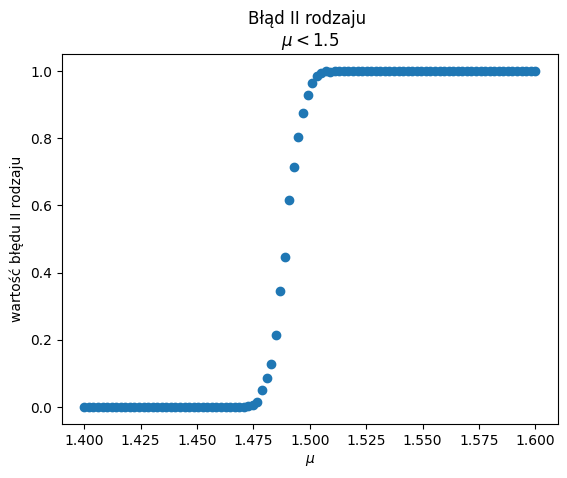

In [12]:
plt.scatter(H1_3, H3_list)
plt.xlabel(r'$\mu$')
plt.ylabel('wartość błędu II rodzaju')
plt.title('Błąd II rodzaju \n' + r'$\mu < 1.5$')
plt.show()

# 2 - dla $\sigma^2$

# $\sigma^2 \neq 1.5$

In [139]:
# H2_1 = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55]
H2_1 = np.linspace(1,2,100)

def zadanie4_2a(alfa, H1, mu, n, N):
    # sigma^2 != 1.5
    rejected = 0
    for i in range(N):
        X_ = np.random.normal(mu, np.sqrt(H1), size = n)
        S2 = np.var(X_)
        Chi2 = (n-1) * S2 / H0
        x1 = scipy.stats.chi2.ppf(alfa / 2, n-1)
        x2 = scipy.stats.chi2.ppf(1 - alfa / 2,n-1)
        if Chi2 >= x1 and Chi2 <= x2:
            rejected += 1

    false_negative = rejected / N

    return false_negative

In [115]:
H1_list2 = []
for H in H2_1:
    h = zadanie4_2a(alfa, H, mu, n, N)
    H1_list2.append(h)
    print(H, h)

1.0 0.0
1.0101010101010102 0.0
1.02020202020202 0.0
1.0303030303030303 0.0
1.0404040404040404 0.0
1.0505050505050506 0.0
1.0606060606060606 0.0
1.0707070707070707 0.0
1.0808080808080809 0.0
1.0909090909090908 0.0
1.101010101010101 0.0
1.1111111111111112 0.0
1.121212121212121 0.0
1.1313131313131313 0.0
1.1414141414141414 0.0
1.1515151515151516 0.0
1.1616161616161615 0.0
1.1717171717171717 0.0
1.1818181818181819 0.0
1.191919191919192 0.002
1.202020202020202 0.003
1.2121212121212122 0.001
1.2222222222222223 0.003
1.2323232323232323 0.008
1.2424242424242424 0.01
1.2525252525252526 0.016
1.2626262626262625 0.028
1.2727272727272727 0.035
1.2828282828282829 0.048
1.2929292929292928 0.102
1.303030303030303 0.117
1.3131313131313131 0.145
1.3232323232323233 0.2
1.3333333333333335 0.26
1.3434343434343434 0.323
1.3535353535353536 0.374
1.3636363636363638 0.421
1.3737373737373737 0.5
1.3838383838383839 0.57
1.393939393939394 0.634
1.404040404040404 0.71
1.4141414141414141 0.745
1.4242424242424243 0

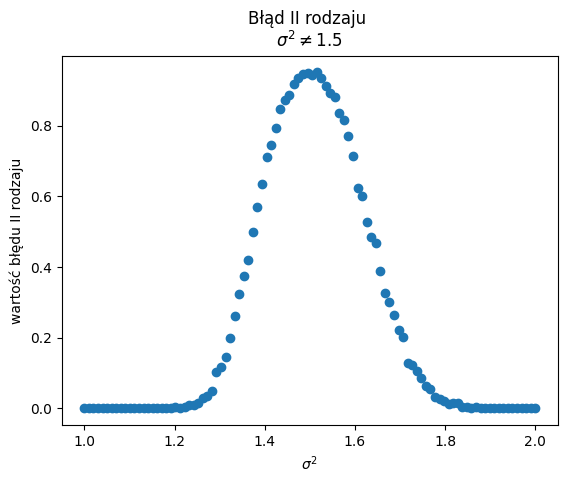

In [116]:
plt.scatter(H2_1, H1_list2)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('wartość błędu II rodzaju')
plt.title('Błąd II rodzaju \n' + r'$\sigma^2 \neq 1.5$')
plt.show()

# $\sigma^2 > 1.5$

In [117]:
# H2_2 = [1.51, 1.515, 1.52, 1.525, 1.53, 1.535, 1.54, 1.545, 1.55]
H2_2 = np.linspace(1,2,100)

def zadanie4_2b(alfa, H1, mu, n, N):
    # sigma^2 > 1.5
    rejected = 0
    for i in range(N):
        X_ = np.random.normal(mu, np.sqrt(H1), size = n)
        S2 = np.var(X_)
        Chi2 = (n-1) * S2 / H0
        x = scipy.stats.chi2.ppf(1 - alfa, n-1)
        if Chi2 <= x:
            rejected += 1

    false_negative = rejected / N

    return false_negative

In [118]:
H2_list2 = []
for H in H2_2:
    h = zadanie4_2b(alfa, H, mu, n, N)
    H2_list2.append(h)
    print(H, h)

1.0 1.0
1.0101010101010102 1.0
1.02020202020202 1.0
1.0303030303030303 1.0
1.0404040404040404 1.0
1.0505050505050506 1.0
1.0606060606060606 1.0
1.0707070707070707 1.0
1.0808080808080809 1.0
1.0909090909090908 1.0
1.101010101010101 1.0
1.1111111111111112 1.0
1.121212121212121 1.0
1.1313131313131313 1.0
1.1414141414141414 1.0
1.1515151515151516 1.0
1.1616161616161615 1.0
1.1717171717171717 1.0
1.1818181818181819 1.0
1.191919191919192 1.0
1.202020202020202 1.0
1.2121212121212122 1.0
1.2222222222222223 1.0
1.2323232323232323 1.0
1.2424242424242424 1.0
1.2525252525252526 1.0
1.2626262626262625 1.0
1.2727272727272727 1.0
1.2828282828282829 1.0
1.2929292929292928 1.0
1.303030303030303 1.0
1.3131313131313131 1.0
1.3232323232323233 1.0
1.3333333333333335 1.0
1.3434343434343434 1.0
1.3535353535353536 0.999
1.3636363636363638 1.0
1.3737373737373737 1.0
1.3838383838383839 1.0
1.393939393939394 0.999
1.404040404040404 0.999
1.4141414141414141 0.999
1.4242424242424243 0.999
1.4343434343434343 0.997


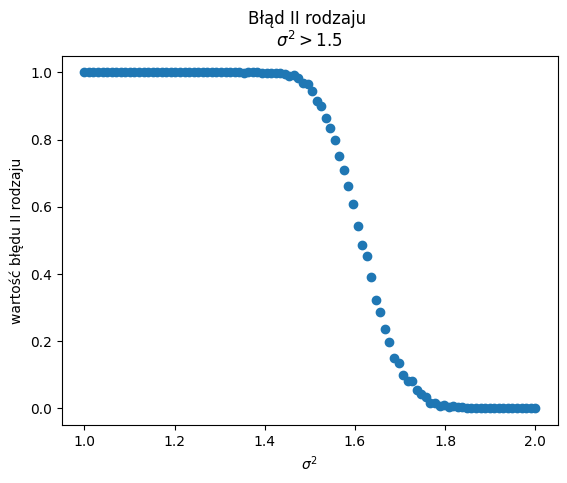

In [119]:
plt.scatter(H2_2, H2_list2)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('wartość błędu II rodzaju')
plt.title('Błąd II rodzaju \n' + r'$\sigma^2 > 1.5$')
plt.show()

# $\sigma^2 < 1.5$

In [120]:
# H2_3 = [1.45, 1.455, 1.46, 1.465, 1.47, 1.475, 1.48, 1.485, 1.49, 1.495]
H2_3 = np.linspace(1,2,100)

def zadanie4_2c(alfa, H1, mu, n, N):
    # sigma^2 < 1.5
    rejected = 0
    for i in range(N):
        X_ = np.random.normal(mu, np.sqrt(H1), size = n)
        S2 = np.var(X_)
        Chi2 = (n-1) * S2 / H0
        x = scipy.stats.chi2.ppf(alfa, n-1)
        if Chi2 >= x:
            rejected += 1

    false_negative = rejected / N

    return false_negative

In [121]:
H3_list2 = []
for H in H2_3:
    h = zadanie4_2c(alfa, H, mu, n, N)
    H3_list2.append(h)
    print(H, h)

1.0 0.0
1.0101010101010102 0.0
1.02020202020202 0.0
1.0303030303030303 0.0
1.0404040404040404 0.0
1.0505050505050506 0.0
1.0606060606060606 0.0
1.0707070707070707 0.0
1.0808080808080809 0.0
1.0909090909090908 0.0
1.101010101010101 0.0
1.1111111111111112 0.0
1.121212121212121 0.0
1.1313131313131313 0.0
1.1414141414141414 0.0
1.1515151515151516 0.0
1.1616161616161615 0.0
1.1717171717171717 0.0
1.1818181818181819 0.0
1.191919191919192 0.0
1.202020202020202 0.0
1.2121212121212122 0.001
1.2222222222222223 0.002
1.2323232323232323 0.001
1.2424242424242424 0.008
1.2525252525252526 0.005
1.2626262626262625 0.007
1.2727272727272727 0.011
1.2828282828282829 0.031
1.2929292929292928 0.047
1.303030303030303 0.069
1.3131313131313131 0.097
1.3232323232323233 0.117
1.3333333333333335 0.169
1.3434343434343434 0.201
1.3535353535353536 0.266
1.3636363636363638 0.328
1.3737373737373737 0.391
1.3838383838383839 0.45
1.393939393939394 0.529
1.404040404040404 0.589
1.4141414141414141 0.636
1.424242424242424

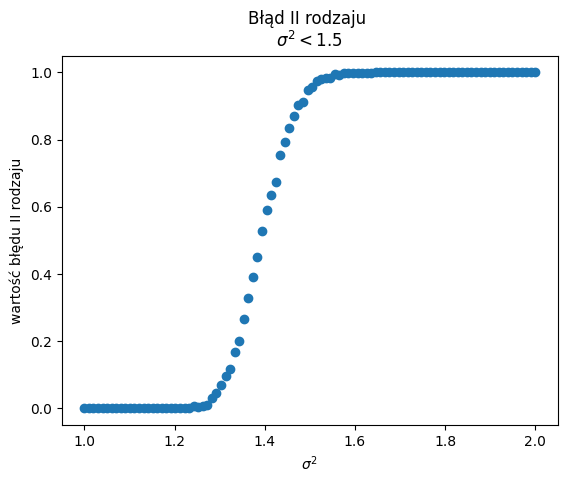

In [122]:
plt.scatter(H2_3, H3_list2)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('wartość błędu II rodzaju')
plt.title('Błąd II rodzaju \n' + r'$\sigma^2 < 1.5$')
plt.show()

# Moc testu

# 1 - dla $\mu$

# $\mu \neq 1.5$

In [140]:
moc1_1 = []
for h in H1_list:
    moc1_1.append(1-h)
print(moc1_1)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.994, 0.979, 0.954, 0.913, 0.875, 0.765, 0.6759999999999999, 0.51, 0.43300000000000005, 0.31299999999999994, 0.19899999999999995, 0.11699999999999999, 0.061000000000000054, 0.061000000000000054, 0.04400000000000004, 0.07599999999999996, 0.127, 0.18200000000000005, 0.29300000000000004, 0.41400000000000003, 0.554, 0.671, 0.791, 0.863, 0.922, 0.949, 0.976, 0.994, 0.995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


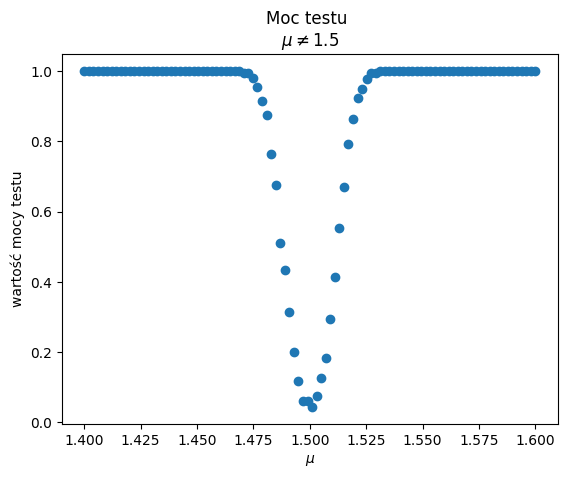

In [145]:
plt.scatter(H1_1, moc1_1)
plt.xlabel(r'$\mu$')
plt.ylabel('wartość mocy testu')
plt.title('Moc testu \n' + r'$\mu \neq 1.5$')
plt.show()

# $\mu > 1.5$

In [147]:
moc1_2 = []
for h in H2_list:
    moc1_2.append(1-h)
print(moc1_2)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000000009, 0.0020000000000000018, 0.007000000000000006, 0.017000000000000015, 0.03500000000000003, 0.06599999999999995, 0.118, 0.21099999999999997, 0.30500000000000005, 0.406, 0.5589999999999999, 0.653, 0.769, 0.877, 0.907, 0.962, 0.98, 0.993, 0.995, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


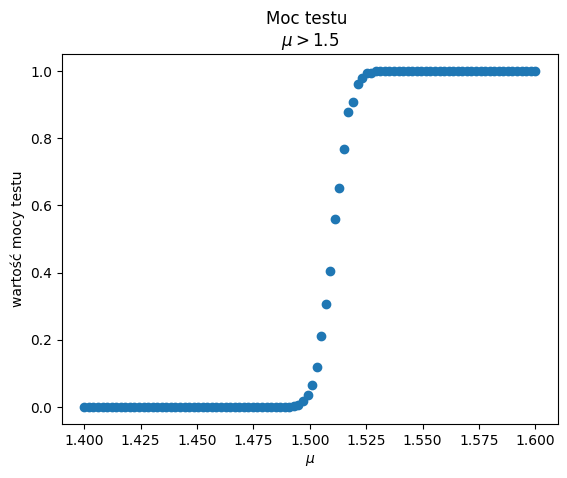

In [159]:
plt.scatter(H1_2, moc1_2)
plt.xlabel(r'$\mu$')
plt.ylabel('wartość mocy testu')
plt.title('Moc testu \n' + r'$\mu > 1.5$')
plt.show()

# $\mu < 1.5$

In [161]:
moc1_3 = []
for h in H3_list:
    moc1_3.append(1-h)
print(moc1_3)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.994, 0.992, 0.976, 0.957, 0.921, 0.854, 0.784, 0.657, 0.562, 0.41800000000000004, 0.30300000000000005, 0.19499999999999995, 0.11499999999999999, 0.06599999999999995, 0.029000000000000026, 0.015000000000000013, 0.007000000000000006, 0.0040000000000000036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


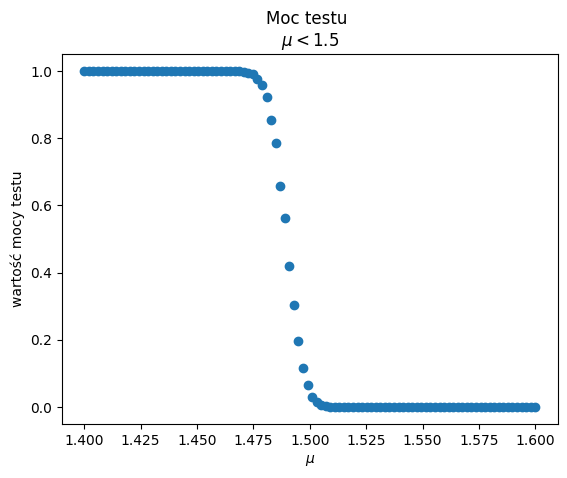

In [162]:
plt.scatter(H1_3, moc1_3)
plt.xlabel(r'$\mu$')
plt.ylabel('wartość mocy testu')
plt.title('Moc testu \n' + r'$\mu < 1.5$')
plt.show()

# 2 - dla $\sigma^2$

# $\sigma^2 \neq 1.5$

In [163]:
moc2_1 = []
for h in H1_list2:
    moc2_1.append(1-h)
print(moc2_1)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.997, 0.999, 0.997, 0.992, 0.99, 0.984, 0.972, 0.965, 0.952, 0.898, 0.883, 0.855, 0.8, 0.74, 0.677, 0.626, 0.579, 0.5, 0.43000000000000005, 0.366, 0.29000000000000004, 0.255, 0.20599999999999996, 0.15400000000000003, 0.128, 0.11399999999999999, 0.08099999999999996, 0.06599999999999995, 0.05400000000000005, 0.050000000000000044, 0.05700000000000005, 0.049000000000000044, 0.06499999999999995, 0.08799999999999997, 0.10699999999999998, 0.118, 0.16500000000000004, 0.18300000000000005, 0.22799999999999998, 0.28700000000000003, 0.376, 0.398, 0.473, 0.516, 0.532, 0.611, 0.673, 0.698, 0.737, 0.778, 0.7989999999999999, 0.872, 0.876, 0.895, 0.915, 0.9359999999999999, 0.945, 0.967, 0.973, 0.979, 0.989, 0.986, 0.985, 0.997, 0.997, 0.998, 0.997, 0.999, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


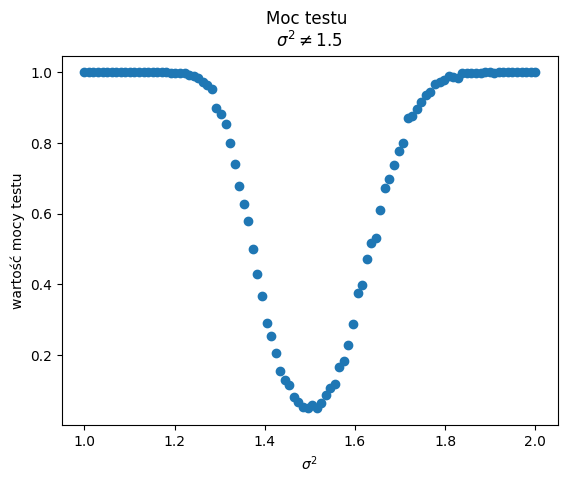

In [165]:
plt.scatter(H2_1, moc2_1)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('wartość mocy testu')
plt.title('Moc testu \n' + r'$\sigma^2 \neq 1.5$')
plt.show()

# $\sigma^2 > 1.5$

In [166]:
moc2_2 = []
for h in H2_list2:
    moc2_2.append(1-h)
print(moc2_2)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000000009, 0.0, 0.0, 0.0, 0.0010000000000000009, 0.0010000000000000009, 0.0010000000000000009, 0.0010000000000000009, 0.0030000000000000027, 0.006000000000000005, 0.01200000000000001, 0.009000000000000008, 0.016000000000000014, 0.031000000000000028, 0.03600000000000003, 0.05700000000000005, 0.08399999999999996, 0.09899999999999998, 0.136, 0.16700000000000004, 0.20199999999999996, 0.248, 0.29100000000000004, 0.33899999999999997, 0.393, 0.45799999999999996, 0.515, 0.5469999999999999, 0.61, 0.679, 0.712, 0.764, 0.8029999999999999, 0.85, 0.866, 0.902, 0.92, 0.92, 0.944, 0.956, 0.967, 0.985, 0.983, 0.992, 0.99, 0.995, 0.994, 0.997, 0.996, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


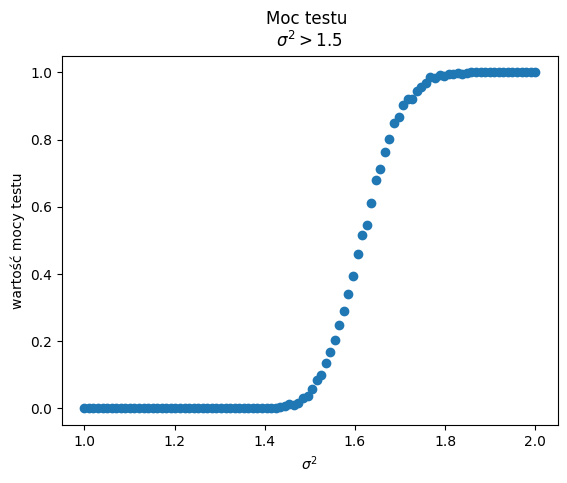

In [167]:
plt.scatter(H2_2, moc2_2)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('wartość mocy testu')
plt.title('Moc testu \n' + r'$\sigma^2 > 1.5$')
plt.show()

# $\sigma^2 < 1.5$

In [168]:
moc2_3 = []
for h in H3_list2:
    moc2_3.append(1-h)
print(moc2_3)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.998, 0.999, 0.992, 0.995, 0.993, 0.989, 0.969, 0.953, 0.931, 0.903, 0.883, 0.831, 0.7989999999999999, 0.734, 0.6719999999999999, 0.609, 0.55, 0.471, 0.41100000000000003, 0.364, 0.32599999999999996, 0.247, 0.20599999999999996, 0.16500000000000004, 0.129, 0.09799999999999998, 0.08699999999999997, 0.05300000000000005, 0.04300000000000004, 0.026000000000000023, 0.019000000000000017, 0.016000000000000014, 0.016000000000000014, 0.0050000000000000044, 0.007000000000000006, 0.0030000000000000027, 0.0020000000000000018, 0.0030000000000000027, 0.0020000000000000018, 0.0010000000000000009, 0.0010000000000000009, 0.0010000000000000009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


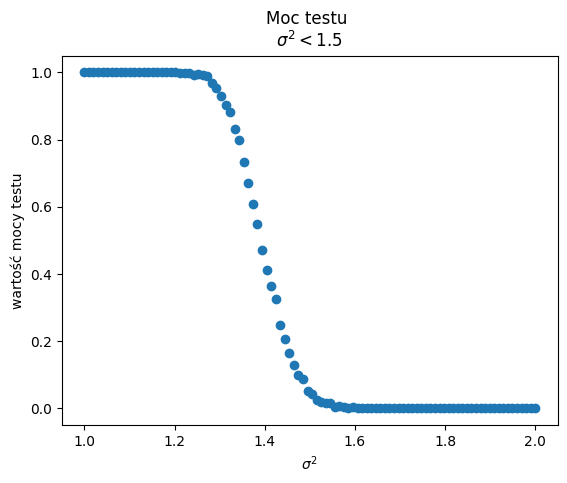

In [169]:
plt.scatter(H2_3, moc2_3)
plt.xlabel(r'$\sigma^2$')
plt.ylabel('wartość mocy testu')
plt.title('Moc testu \n' + r'$\sigma^2 < 1.5$')
plt.show()